# Lab: Build Neural Networks via Pytorch

The purpose of this assignment is to learn how to build neural networks using PyTorch, focusing on both the theoretical and practical aspects of the process.

One key step involves passing the output of a regression model through the Sigmoid function. This operation transforms the raw output (often called the logit) into a probability value between 0 and 1, which represents the likelihood of an observation belonging to the positive class. 

This step is particularly important in binary classification tasks, as it allows us to interpret the model's predictions in probabilistic terms and enables subsequent evaluation using metrics such as accuracy or binary cross-entropy loss.

## Imports
<hr>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchsummary import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Neural Network Classification
<hr>

### 1. Binary Classification

We will build a binary classification model using PyTorch. The output of the regression model will be passed through the Sigmoid function to convert it into a value between 0 and 1, representing the probability that an observation belongs to the positive class.

#### PyTorch Tensor

Please convert your input data, X (features) and y (labels), into PyTorch tensors so they can be used with PyTorch models.

X_t and y_t are created as tensors with the data type torch.float32, which is required for most machine learning tasks in PyTorch.

In [96]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)


# Your code for tensor
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)


#### TensorDataset
Use PyTorch's TensorDataset and DataLoader to prepare the dataset for training, including batching and shuffling.

Requirements:

Combine X_t and y_t into a dataset using TensorDataset.

Use DataLoader to create batches of data for training. The batch size should be specified by the variable 45.
Enable shuffle=True in the DataLoader to randomize the order of data for each epoch.

In [99]:
# Create dataloader
# Your code for TensorDataset and dataloader
batchSize = 45
dataset = TensorDataset(X_t, y_t)

dataloader = DataLoader(dataset, batch_size=batchSize, shuffle=True)

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Data points with y = 0 should be marked in blue, and those with y = 1 should be marked in red.
- Both the x-axis and y-axis labels should have a font size of 14.

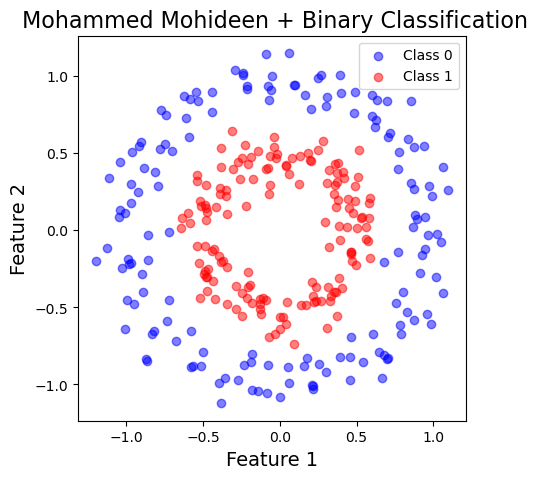

In [102]:

# Plot each class
# Your code plot with scatter
plt.figure(figsize=(5, 5))

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', alpha=0.5)

# Add Label and title
plt.title(" Mohammed Mohideen + Binary Classification", fontsize=16)
# Your code set graph axises

plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.legend()

In [103]:
# Plot each class
# Example results

We're going to start using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

#### Create Neural Network 

Implement a neural network class for binary classification using PyTorch's nn.Module.

- Create a fully connected layer that maps the input features to the hidden layer.
- Use Relu as activation
- Create another fully connected layer
- Use Sigmoid


In [135]:

class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            # Your code
            nn.Linear(input_size, hidden_size),  
            nn.ReLU(),                           
            nn.Linear(hidden_size, output_size), 
            nn.Sigmoid()                         

        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Build trainer

Implement a simple training wrapper for a PyTorch network that handles the forward pass, backpropagation, and parameter updates for multiple epochs.

Training Process:

Epoch Loop: 
- Iterate over the specified number of epochs.

Batch Loop:
- Iterate over batches of X and y from the dataloader.
- Clear the gradients using optimizer.zero_grad().
- Perform a forward pass:
- Use the model to compute predictions (y_hat).
- Flatten the output to match the expected shape if necessary.
- Calculate the loss using criterion(y_hat, y).
- Perform backpropagation with loss to compute gradients.
- Update model parameters using optimizer.step().
- Accumulate the loss for the batch into a running total.

Logging:
- At the end of each epoch, compute and print the average loss over all batches if verbose is True.

In [174]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    # You may review the ipynb file from Week 6
    train_loss_per_epoch = []  
    # Your code
    for epoch in range(epochs):
        model.train()
        total_train_loss = 0

        for X, y in dataloader:
            optimizer.zero_grad()       # Clear gradients w.r.t. parameters
            y_hat = model(X).flatten()      # Forward pass to get output
            loss = criterion(y_hat, y.type(torch.float32))        # Calculate loss
            loss.backward()         # Getting gradients w.r.t. parameters
            optimizer.step()            # Update parameters
            total_train_loss += loss.item()      # Add loss for this batch to running total
        avg_train_loss = total_train_loss / len(dataloader)
        train_loss_per_epoch.append(avg_train_loss)
        if verbose: print(f"epoch: {epoch + 1}, loss: {total_train_loss / len(dataloader):.4f}")
    
    
    
    results = {
        "train_loss": train_loss_per_epoch
    }
    return results

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [178]:
#LEARNING_RATE = 0.1
#criterion = torch.nn.BCELoss()  # loss function - binary cross entropy loss
#optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm - Adam

Let's train the model:

In [181]:
input_size = 2   
hidden_size = 6 
output_size = 1  


# set your mode with 2 input layers, 6 hidden layers, and 1 output layers via binaryClassifier class
model = binaryClassifier(input_size, hidden_size, output_size)

#### Activation functions

We're going to using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [214]:
LEARNING_RATE = 0.1
criterion = torch.nn.BCELoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm

In [216]:
# build your trainer funtion with model, criterion, optimizer, dataloader, epochs=30, verbose=True
# Your code

epochs = 30
train_losses = trainer(model, criterion, optimizer, dataloader, epochs=epochs, verbose=True)

epoch: 1, loss: 0.0116
epoch: 2, loss: 0.0151
epoch: 3, loss: 0.0069
epoch: 4, loss: 0.0117
epoch: 5, loss: 0.0076
epoch: 6, loss: 0.0062
epoch: 7, loss: 0.0072
epoch: 8, loss: 0.0053
epoch: 9, loss: 0.0057
epoch: 10, loss: 0.0049
epoch: 11, loss: 0.0045
epoch: 12, loss: 0.0037
epoch: 13, loss: 0.0044
epoch: 14, loss: 0.0036
epoch: 15, loss: 0.0039
epoch: 16, loss: 0.0037
epoch: 17, loss: 0.0036
epoch: 18, loss: 0.0037
epoch: 19, loss: 0.0041
epoch: 20, loss: 0.0039
epoch: 21, loss: 0.0044
epoch: 22, loss: 0.0043
epoch: 23, loss: 0.0061
epoch: 24, loss: 0.0041
epoch: 25, loss: 0.0049
epoch: 26, loss: 0.0047
epoch: 27, loss: 0.0045
epoch: 28, loss: 0.0056
epoch: 29, loss: 0.0068
epoch: 30, loss: 0.0034


#### Visualize your results 

#### Part 1: Loss Curve

- Please plot the loss curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

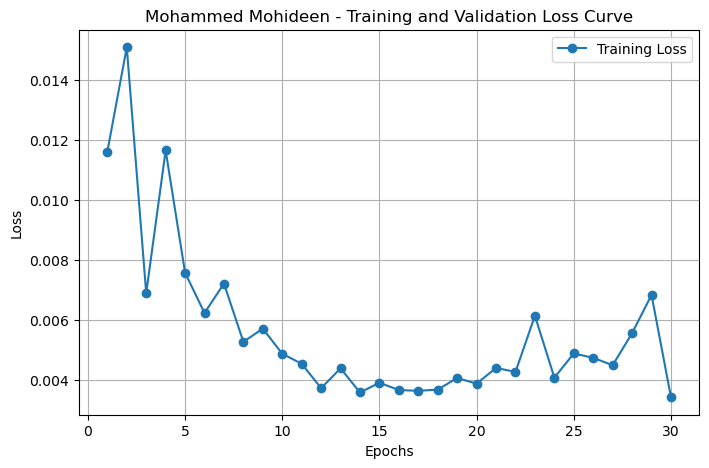

In [220]:
train_loss = train_losses["train_loss"]      

# Plot Training and Validation Loss Curve
plt.figure(figsize=(8, 5))  
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss", marker='o')  
plt.xlabel("Epochs")  
plt.ylabel("Loss")  
plt.title("Mohammed Mohideen - Training and Validation Loss Curve")  
plt.legend()  
plt.grid(True)  
plt.show()

### Part 2: Actual and predicted data 

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

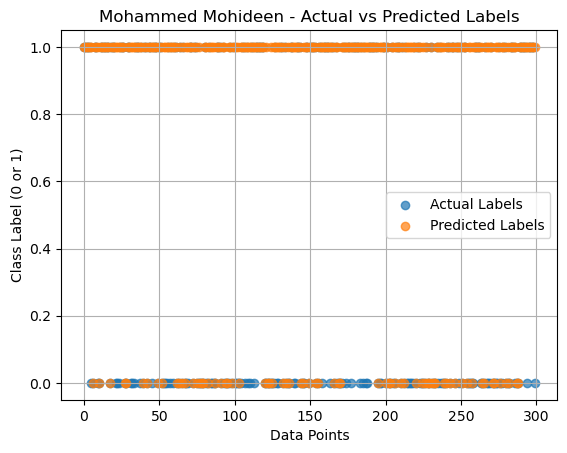

In [223]:
# Your code
model.eval()  # Set the model to evaluation mode

predictions = []
probabilities = []
actual_labels = []  

with torch.no_grad():  
    for X, y in dataloader:
        y_hat = model(X).flatten()  
        prob = torch.sigmoid(y_hat)  
        predicted_class = (prob > 0.5).float()
        
        predictions.extend(predicted_class.numpy())  
        probabilities.extend(prob.numpy())  
        actual_labels.extend(y.numpy())  
        
predictions = np.array(predictions)
probabilities = np.array(probabilities)
actual_labels = np.array(actual_labels)

plt.scatter(range(len(actual_labels)), actual_labels, label="Actual Labels", alpha=0.7)
plt.scatter(range(len(predictions)), predictions, label="Predicted Labels", alpha=0.7)
plt.xlabel("Data Points")
plt.ylabel("Class Label (0 or 1)")
plt.title("Mohammed Mohideen - Actual vs Predicted Labels")
plt.legend()
plt.grid(True)
plt.show()


To be clear, our model is just outputting some number between -1 and +1 (we are applying Sigmoid in the model), so:
- To get the probabilities we would need to pass them through a Sigmoid;
- To get classes, we can apply some threshold (usually 0.5) to this probability.

For example, we would expect the point (0,0) to have a high probability and the point (-1,-1) to have a low probability:

In [225]:
prediction = np.array(predictions)
print(prediction)

[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [227]:
probability = np.array(probabilities)
print(probability)

[0.7310417  0.7310584  0.73105836 0.7234948  0.7310582  0.50000036
 0.5        0.7309572  0.731057   0.50000006 0.5        0.7310243
 0.7310584  0.7310577  0.7310584  0.6787887  0.7310584  0.5
 0.73105735 0.7310584  0.7310584  0.50000787 0.5000009  0.50004125
 0.73105836 0.7310584  0.73105544 0.5        0.5        0.7310524
 0.7310584  0.50000226 0.50023776 0.50000006 0.7310581  0.7310584
 0.7310584  0.5002473  0.7310584  0.5        0.7300958  0.7305266
 0.5        0.7310583  0.73104304 0.5000039  0.73080075 0.7310584
 0.7310516  0.5        0.7310584  0.7310296  0.5        0.50000006
 0.500158   0.50000054 0.7310584  0.50022644 0.7237759  0.5008327
 0.7310584  0.73105586 0.5        0.5        0.73105305 0.5
 0.7310584  0.5        0.5006661  0.5000061  0.7310584  0.7310584
 0.5        0.73105353 0.73105574 0.5        0.50000566 0.5
 0.5        0.5        0.73105836 0.50002074 0.5        0.7310584
 0.50000006 0.5000003  0.5000004  0.5        0.7310584  0.73097664
 0.73105776 0.5        0

In [229]:
classes = np.where(probability > 0.5, 1, 0)
print(classes)

[1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1
 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1]


### 2. Multiclass Classification

For multiclass classification, we'll need the softmax function:

$$\sigma(\vec{z})_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$$

It basically outputs probabilities for each class we wish to predict, and they all sum to 1. 

`torch.nn.CrossEntropyLoss` is a loss that combines a softmax with cross entropy loss. 

Let's try a 4-class classification problem using the following network:


In [275]:
X, y = make_blobs(n_samples=200, centers=4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.long)

# Create dataloader
dataset = TensorDataset(X_t, y_t)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [277]:
class multiClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Both the x-axis and y-axis labels should have a font size of 14.

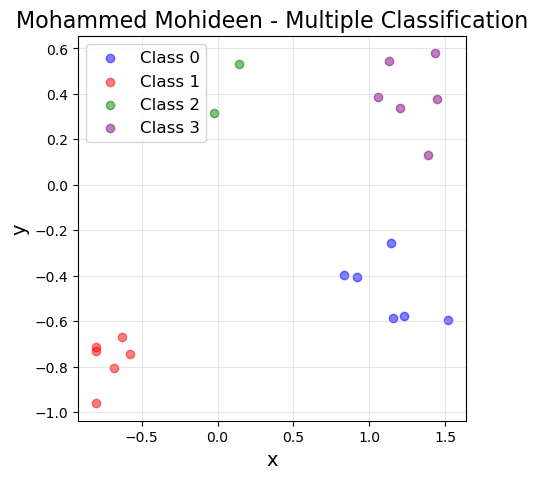

In [292]:
# Plot each class
# Your code plot with scatter
plt.figure(figsize=(5, 5))

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.5)
# Class 1 (Red)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', alpha=0.5)
# Class 2 (Green)
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='green', label='Class 2', alpha=0.5)
# Class 3 (Purple)
plt.scatter(X[y == 3][:, 0], X[y == 3][:, 1], color='purple', label='Class 3', alpha=0.5)

# Add title and labels
plt.title("Mohammed Mohideen - Multiple Classification", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()

Let's train this model:

In [299]:
# model with 2 input layers, 6 hidden layers, and 4 output layers via multiClassifier class
# Your code 
model = multiClassifier(2, 6, 4)  # 2 inputs, 6 hidden units, 4 output classes
criterion = nn.CrossEntropyLoss()  # Includes softmax
optimizer = optim.Adam(model.parameters(), lr=0.2)

# Train the model
epochs = 30
train_loss_per_epoch = []

for epoch in range(epochs):
    model.train()
    total_train_loss = 0

    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()  # Clear gradients w.r.t. parameters

        # Forward pass to get output
        y_hat = model(X_batch)

        # Calculate loss (y_batch should be integers in the range [0, 3])
        loss = criterion(y_hat, y_batch)

        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update the model parameters

        total_train_loss += loss.item()  # Add loss for this batch to running total

    avg_train_loss = total_train_loss / len(dataloader)
    train_loss_per_epoch.append(avg_train_loss)
    print(f"Epoch: {epoch + 1}, Loss: {avg_train_loss:.4f}")

# Store the final results for plotting or analysis
results = {"train_loss": train_loss_per_epoch}

Epoch: 1, Loss: 1.2835
Epoch: 2, Loss: 0.7597
Epoch: 3, Loss: 0.4834
Epoch: 4, Loss: 0.2305
Epoch: 5, Loss: 0.0640
Epoch: 6, Loss: 0.0147
Epoch: 7, Loss: 0.0059
Epoch: 8, Loss: 0.0027
Epoch: 9, Loss: 0.0016
Epoch: 10, Loss: 0.0012
Epoch: 11, Loss: 0.0011
Epoch: 12, Loss: 0.0009
Epoch: 13, Loss: 0.0008
Epoch: 14, Loss: 0.0009
Epoch: 15, Loss: 0.0008
Epoch: 16, Loss: 0.0006
Epoch: 17, Loss: 0.0005
Epoch: 18, Loss: 0.0005
Epoch: 19, Loss: 0.0005
Epoch: 20, Loss: 0.0005
Epoch: 21, Loss: 0.0005
Epoch: 22, Loss: 0.0005
Epoch: 23, Loss: 0.0004
Epoch: 24, Loss: 0.0004
Epoch: 25, Loss: 0.0004
Epoch: 26, Loss: 0.0004
Epoch: 27, Loss: 0.0004
Epoch: 28, Loss: 0.0004
Epoch: 29, Loss: 0.0004
Epoch: 30, Loss: 0.0004


#### Visualize your results 

### Part 3: Accuracy Curve for 4 classes

- Please plot the Accuracy Curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

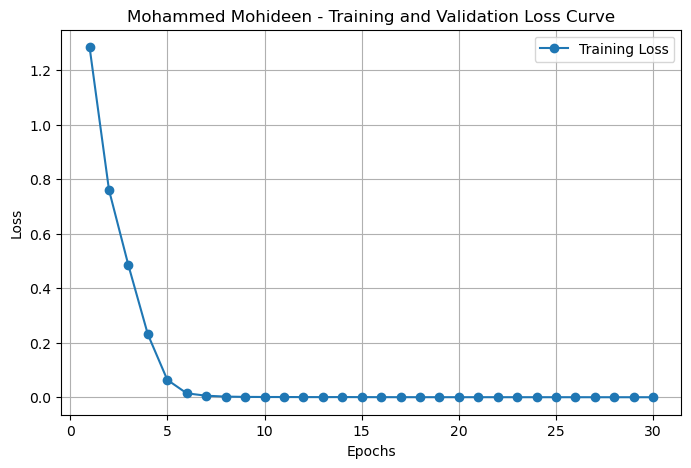

In [303]:
# Your code
train_loss = results["train_loss"]      

# Plot Training and Validation Loss Curve
plt.figure(figsize=(8, 5))  
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss", marker='o')  
plt.xlabel("Epochs")  
plt.ylabel("Loss")  
plt.title("Mohammed Mohideen - Training and Validation Loss Curve")  
plt.legend()  
plt.grid(True)  
plt.show()


### Part 4: Actual and predicted data for classes

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

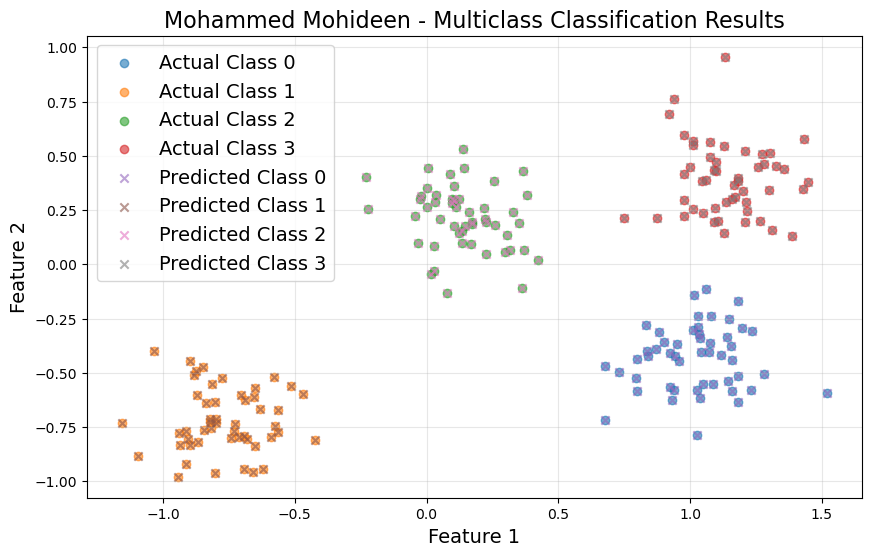

In [322]:
model.eval()  # Set the model to evaluation mode

predictions = []
probabilities = []
actual_labels = []
X_data = []  # To accumulate all the input data

with torch.no_grad():  
    for X, y in dataloader:
        y_hat = model(X)  
        prob = torch.softmax(y_hat, dim=1)  
        predicted_class = torch.argmax(prob, dim=1)  
        
        predictions.extend(predicted_class.numpy())  
        probabilities.extend(prob.numpy())  
        actual_labels.extend(y.numpy())  
        X_data.append(X.numpy())  # Collect input data

# Convert lists to numpy arrays
predictions = np.array(predictions)
actual_labels = np.array(actual_labels)

# Combine all batches of X into a single array
X_data = np.concatenate(X_data, axis=0)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot actual data points 
for i in range(4):  # Assuming 4 classes
    mask = actual_labels == i
    plt.scatter(X_data[mask, 0], X_data[mask, 1], label=f'Actual Class {i}', alpha=0.6)

# Plot predicted data points 
for i in range(4):  # Assuming 4 classes
    mask = predictions == i
    plt.scatter(X_data[mask, 0], X_data[mask, 1], label=f'Predicted Class {i}', marker='x', alpha=0.6)


plt.title("Mohammed Mohideen - Multiclass Classification Results", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)

plt.legend(fontsize=14)


plt.grid(True, alpha=0.3)

plt.show()
